# Decision Trees Classifier (Mask, No Mask, Incorrect Mask)

## Imports

In [1]:
# Import Metrics, Classifier and Graphing Packages
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import seaborn as sns # for confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to plot image, graph

import pickle
import time # for computation time assessment
%matplotlib inline

## Prepare Dataset

### Pickle Dataset

In [2]:
# LOAD FEATURES AND LABELS FROM PICKLE

# Note: Pickles are mask, no mask, incorrect wear of mask dataset in grayscale
# See data pre-processing for more information

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in) # 3D Feature set

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in) # 1D Target set

pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in) # 2-D Feature Set, Data matrix will serve as X

### Dataset Classification Distribution

In [3]:
# Dataset class distribution for mask, no mask, incorrect wear of mask

print('# of Samples:', len(y))
print('# of Without A Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())
print('# of With A Mask:', (y == 2).sum())

# of Samples: 15737
# of Without A Mask: 5000
# of Incorrectly Worn Mask: 5737
# of With A Mask: 5000


### Convert Numpy to Dataframe

In [4]:
# Get Column Names
cols = []
for i in range(0, len(data[0])):
    cols.append("P" + str(i))

# Convert to Dataframe
numpy_data = data
X = pd.DataFrame(data=numpy_data, columns=[cols])
print(X.head())

y = pd.DataFrame(data=y, columns=["Mask_Target"])
print(y.head())

    P0   P1   P2   P3   P4   P5   P6   P7   P8   P9  ... P4086 P4087 P4088  \
0  205  195  202  136   76   77   56   66   69   59  ...   144    76    52   
1   97   97   96   96   93   94   97   94   95   91  ...    54    57    58   
2   38   37   29   22   28   30   12   17   22   17  ...    15    10    17   
3  248  248  246  249  249  246  244  229  194  193  ...    84    48    48   
4  160  147  133  137  142  135  114   98   92   92  ...   111   103   110   

  P4089 P4090 P4091 P4092 P4093 P4094 P4095  
0    43    42    35    39    43    41    32  
1    61    59    66    77    80    83    80  
2    28    40    17    19    19    17    19  
3    57    40    29    13    15    15    22  
4   134   143   144   114   102    65    35  

[5 rows x 4096 columns]
   Mask_Target
0            0
1            0
2            0
3            0
4            0


### Data Shape

In [5]:
# Shape of Feature and Target Sets
# There are 15,737 samples
# See Data preprocessing for more information

print('\nImage Data Shape:', X.shape) # Feature sets are 64X64 images flatten to a 4096 feature vector
print('Image Data Shape Features:', data.shape)
print('Image Data Shape Target:', y.shape)


Image Data Shape: (15737, 4096)
Image Data Shape Features: (15737, 4096)
Image Data Shape Target: (15737, 1)


### Normalize the Data

In [6]:
# Normalize the pixel values
X = X / 255.0

### Split Train + Test, random_state

In [7]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ', len(X_train), '\nLength of our Testing data: ', len(X_test))

Length of our Training data:  12589 
Length of our Testing data:  3148


## Decision Trees Classifier
Build and Train Decision Trees model, No Hyperparameter Tuning

#### Fit Model

In [8]:
# Initialize Decision Trees model, No hyperparameter Tuning
decision_trees = DecisionTreeClassifier()

# Use training data to fit Decision Trees model
decision_trees.fit(X_train, y_train.values.ravel())

# Predict Train Data Labels
predictions_set = decision_trees.predict(X_test)

#### Predict

In [10]:
%%time
# Predict Train Data Labels
predictions_set = decision_trees.predict(X_test)

Wall time: 59.4 ms


#### Pickle Predictions

In [12]:
pickle_out = open("predictions_set1_dt.pickle", "wb")
pickle.dump(predictions_set, pickle_out)
pickle_out.close()

### Performance Metrics, No Hyperparameter Tuning

#### Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score, No Hyperparameter Tuning: 0.8290978398983482')

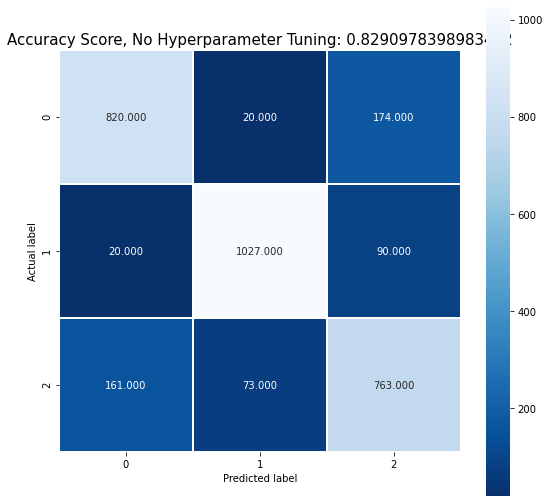

In [13]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score, No Hyperparameter Tuning: {0}'.format(accuracy_score(y_test, predictions_set))
plt.title(title,size=15)

#### Precision, Recall, F1 Score

In [15]:
print('Decision Trees Precision: %.3f' % precision_score(y_test, predictions_set, average='micro'))
print('Decision Trees Recall: %.3f' % recall_score(y_test, predictions_set, average='micro'))
print('Decision Trees F1 Score: %.3f' % f1_score(y_test, predictions_set, average='micro'))

Decision Trees Precision: 0.829
Decision Trees Recall: 0.829
Decision Trees F1 Score: 0.829


#### Classification Report

In [17]:
# RECALL
# CLASS 0: NO MASK
# CLASS 1: INCORRECT WEAR OF MASK
# CLASS 2: CORRECT WEAR OF MASK

print("\nClassification Report\n", classification_report(y_test, predictions_set))


Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.92      0.90      0.91      1137
           2       0.74      0.77      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148



### Visualization of Trees

[Text(110.88551900495169, 214.9690909090909, 'X[1944] <= 0.355\ngini = 0.665\nsamples = 12589\nvalue = [3986, 4600, 4003]'),
 Text(35.994346432190646, 210.02727272727273, 'X[3292] <= 0.41\ngini = 0.34\nsamples = 4798\nvalue = [253, 3822, 723]'),
 Text(19.19948237810625, 205.08545454545455, 'X[3548] <= 0.68\ngini = 0.583\nsamples = 587\nvalue = [175, 87, 325]'),
 Text(10.73430101840335, 200.14363636363635, 'X[3744] <= 0.198\ngini = 0.52\nsamples = 521\nvalue = [173, 33, 315]'),
 Text(4.811245867445069, 195.20181818181817, 'X[2780] <= 0.676\ngini = 0.237\nsamples = 159\nvalue = [14, 7, 138]'),
 Text(3.7983520006145284, 190.26, 'X[1703] <= 0.218\ngini = 0.179\nsamples = 152\nvalue = [14, 1, 137]'),
 Text(3.291905067199258, 185.3181818181818, 'X[4000] <= 0.255\ngini = 0.335\nsamples = 72\nvalue = [14, 1, 57]'),
 Text(2.025787733661082, 180.37636363636364, 'X[3659] <= 0.245\ngini = 0.228\nsamples = 62\nvalue = [7, 1, 54]'),
 Text(1.012893866830541, 175.43454545454546, 'X[3745] <= 0.192\ngin

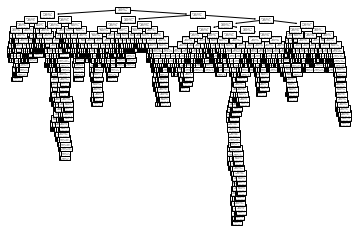

In [18]:
# Import Tree Plot for Visual Representation of Tree
from sklearn.tree import plot_tree
plot_tree(decision_trees) 

## Dimensionality Reduction

### Principal Component Analysis, Keep 90% of variance

In [19]:
from sklearn.decomposition import PCA # Dimensionality Reduction

In [20]:
# Dimensionality Reduction with Principal Component Analysis (PCA)
pca = PCA(0.90) # Preserve 90% of the variance

X_transformed = pca.fit_transform(X_train) # Fit the pca transform with X_train
X_test_transformed = pca.transform(X_test) # Apply transform to X_test

# Training set shape after Principal Component Analysis form
print(X_transformed.shape)

(12589, 157)


In [21]:
# Original Training Set Shape
# Notice we lose 3,943 features using PCA, while preserving 90% variance
print(X_train.shape)

(12589, 4096)


In [22]:
# Initialize Decision Trees model for PCA instance
decision_trees_pca = DecisionTreeClassifier()

# Use training data to fit Decision Trees model with transformed X_train
decision_trees_pca.fit(X_transformed, y_train.values.ravel())

DecisionTreeClassifier()

In [23]:
%%time
# make prediction on entire train data
predictions_set_pca = decision_trees_pca.predict(X_train)
print("Accuracy Train PCA:", accuracy_score(y_train, predictions_set_pca))

ValueError: X has 4096 features, but DecisionTreeClassifier is expecting 157 features as input.

In [24]:
%%time
# make prediction on entire test data
predictions_set_pca = decision_trees_pca.predict(X_test_transformed)
print("Accuracy Train PCA:", accuracy_score(y_test, predictions_set_pca))

Accuracy Train PCA: 0.7579415501905972
Wall time: 1.72 s


#### PCA Classification Report


PCA Classification Report
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      1014
           1       0.85      0.82      0.83      1137
           2       0.66      0.67      0.67       997

    accuracy                           0.76      3148
   macro avg       0.76      0.75      0.75      3148
weighted avg       0.76      0.76      0.76      3148



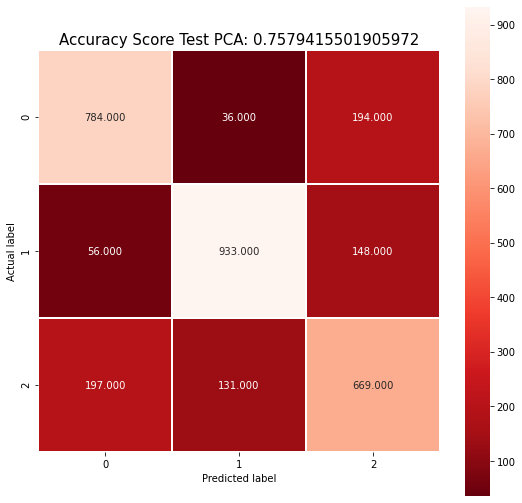

In [25]:
# Calculate Confusion Matrix for 
cm = confusion_matrix(y_test, predictions_set_pca)

plt.figure(figsize=(9,9))

# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score Test PCA: {0}'.format(accuracy_score(y_test, predictions_set_pca))
plt.title(title,size=15)

print("\nPCA Classification Report\n", classification_report(y_test, predictions_set_pca))

### Max Depths [Decision Trees Hyperparameter Tuning]
Determines the depth of a tree. The deeper the tree, the more splits/information is garnered about the data.

> Notes: As depth increases, likelihood of overfitting the data increases

In [28]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

for depth in max_depths:
    # Initialize Classifier with max_depth
    dt = DecisionTreeClassifier(max_depth=depth)
    # Fit Classifier 
    dt.fit(X_train, y_train)
    # Train Classifier Prediction
    train_pred = dt.predict(X_train)
    # Test Classifier Prediction
    y_pred = dt.predict(X_test)
    
    print("For max depth:", max_depth)
    print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
    print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
    print("\nClassification Report\n", classification_report(y_test, y_pred))

#   Best Performing Depth 83.7%, max-depth=10

For max depth: 1.0
===== Accuracy Train: 0.600
===== Accuracy Test: 0.596

Classification Report
               precision    recall  f1-score   support

           0       0.48      0.92      0.63      1014
           1       0.79      0.83      0.81      1137
           2       0.00      0.00      0.00       997

    accuracy                           0.60      3148
   macro avg       0.42      0.58      0.48      3148
weighted avg       0.44      0.60      0.49      3148



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For max depth: 1.0
===== Accuracy Train: 0.699
===== Accuracy Test: 0.692

Classification Report
               precision    recall  f1-score   support

           0       0.56      0.81      0.66      1014
           1       0.88      0.81      0.85      1137
           2       0.67      0.44      0.53       997

    accuracy                           0.69      3148
   macro avg       0.71      0.69      0.68      3148
weighted avg       0.71      0.69      0.69      3148

For max depth: 1.0
===== Accuracy Train: 0.744
===== Accuracy Test: 0.734

Classification Report
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      1014
           1       0.88      0.82      0.85      1137
           2       0.63      0.64      0.64       997

    accuracy                           0.73      3148
   macro avg       0.73      0.73      0.73      3148
weighted avg       0.74      0.73      0.74      3148

For max depth: 1.0
===== Accuracy Train: 0

For max depth: 1.0
===== Accuracy Train: 0.996
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1014
           1       0.92      0.90      0.91      1137
           2       0.76      0.76      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max depth: 1.0
===== Accuracy Train: 0.996
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.91      0.92      0.91      1137
           2       0.76      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max depth: 1.0
===== Accuracy Train: 0

### Minimum Samples Splits [Decision Trees Hyperparameter Tuning]
The minimum number of samples required to split a node. If increased, tree considers more samples at each decision node.

> Notes: Causes more underfitting as it increases number of samples per decision node.

In [31]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

for split in min_samples_splits:
    # Initialize Classifier with minimum samples split
    dt = DecisionTreeClassifier(min_samples_split=split)
    # Fit Classifier 
    dt.fit(X_train, y_train)
    # Train Classifier Prediction
    train_pred = dt.predict(X_train)
    # Test Classifier Prediction
    y_pred = dt.predict(X_test)
    
    print("For min sample splits:", min_samples_split)
    print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
    print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
    print("\nClassification Report\n", classification_report(y_test, y_pred))

#   Best Performing Minimum Sample Splits 75.9%, min sample splits = 0.1

For min sample splits: 0.1
===== Accuracy Train: 0.775
===== Accuracy Test: 0.758

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.63      0.70      1014
           1       0.88      0.87      0.87      1137
           2       0.62      0.76      0.68       997

    accuracy                           0.76      3148
   macro avg       0.76      0.75      0.75      3148
weighted avg       0.77      0.76      0.76      3148

For min sample splits: 0.1
===== Accuracy Train: 0.757
===== Accuracy Test: 0.741

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.65      0.71      1014
           1       0.89      0.80      0.84      1137
           2       0.60      0.76      0.67       997

    accuracy                           0.74      3148
   macro avg       0.76      0.74      0.74      3148
weighted avg       0.76      0.74      0.75      3148

For min sample splits: 0.1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For min sample splits: 0.1
===== Accuracy Train: 0.600
===== Accuracy Test: 0.596

Classification Report
               precision    recall  f1-score   support

           0       0.48      0.92      0.63      1014
           1       0.79      0.83      0.81      1137
           2       0.00      0.00      0.00       997

    accuracy                           0.60      3148
   macro avg       0.42      0.58      0.48      3148
weighted avg       0.44      0.60      0.49      3148



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For min sample splits: 0.1
===== Accuracy Train: 0.600
===== Accuracy Test: 0.596

Classification Report
               precision    recall  f1-score   support

           0       0.48      0.92      0.63      1014
           1       0.79      0.83      0.81      1137
           2       0.00      0.00      0.00       997

    accuracy                           0.60      3148
   macro avg       0.42      0.58      0.48      3148
weighted avg       0.44      0.60      0.49      3148



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For min sample splits: 0.1
===== Accuracy Train: 0.600
===== Accuracy Test: 0.596

Classification Report
               precision    recall  f1-score   support

           0       0.48      0.92      0.63      1014
           1       0.79      0.83      0.81      1137
           2       0.00      0.00      0.00       997

    accuracy                           0.60      3148
   macro avg       0.42      0.58      0.48      3148
weighted avg       0.44      0.60      0.49      3148



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Minimum Samples Leaf [Decision Trees Hyperparameter Tuning]
The minimum number of samples required for each leaf node.
> Notes: May cause underfitting if increased.

In [32]:
min_samples_leaves = np.linspace(0.1, 0.5, 5, endpoint=True)

for min_leaf in min_samples_leaves:
    # Initialize Classifier with minimum samples leaf
    dt = DecisionTreeClassifier(min_samples_leaf=min_leaf)
    # Fit Classifier 
    dt.fit(X_train, y_train)
    # Train Classifier Prediction
    train_pred = dt.predict(X_train)
    # Test Classifier Prediction
    y_pred = dt.predict(X_test)
    
    print("For min samples leafs:", min_leaf)
    print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
    print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
    print("\nClassification Report\n", classification_report(y_test, y_pred))

#   Best Performing Minimum Sample Leaf 68.8%, min sample splits = 0.1

For min samples leafs: 0.1
===== Accuracy Train: 0.724
===== Accuracy Test: 0.709

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.58      0.67      1014
           1       0.79      0.83      0.81      1137
           2       0.58      0.71      0.64       997

    accuracy                           0.71      3148
   macro avg       0.72      0.70      0.70      3148
weighted avg       0.73      0.71      0.71      3148

For min samples leafs: 0.2
===== Accuracy Train: 0.692
===== Accuracy Test: 0.672

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.48      0.59      1014
           1       0.79      0.83      0.81      1137
           2       0.53      0.69      0.60       997

    accuracy                           0.67      3148
   macro avg       0.69      0.67      0.66      3148
weighted avg       0.69      0.67      0.67      3148

For min samples leafs: 0.3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For min samples leafs: 0.5
===== Accuracy Train: 0.365
===== Accuracy Test: 0.361

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1014
           1       0.36      1.00      0.53      1137
           2       0.00      0.00      0.00       997

    accuracy                           0.36      3148
   macro avg       0.12      0.33      0.18      3148
weighted avg       0.13      0.36      0.19      3148



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Max Features [Decision Trees Hyperparameter Tuning]
The number of features to consider when searching for best fit.

> Notes: May overfit with more features

> Sklearn implementation does not stop searching for a split until a valid partition of the node samples is found, including adding more features to the search.

In [33]:
max_features = list(range(1,X_train.shape[1]))

for max_feature in max_features:
    dt = DecisionTreeClassifier(max_featuresmax_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    y_pred = dt.predict(X_test)
    
    print("For max feature:", max_feature)
    print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
    print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
    print("\nClassification Report\n", classification_report(y_test, y_pred))

print("501: 84%, 1138: 84.3%")

For max feature: 1
===== Accuracy Train: 1.000
===== Accuracy Test: 0.653

Classification Report
               precision    recall  f1-score   support

           0       0.66      0.65      0.66      1014
           1       0.72      0.73      0.73      1137
           2       0.56      0.56      0.56       997

    accuracy                           0.65      3148
   macro avg       0.65      0.65      0.65      3148
weighted avg       0.65      0.65      0.65      3148

For max feature: 2
===== Accuracy Train: 1.000
===== Accuracy Test: 0.695

Classification Report
               precision    recall  f1-score   support

           0       0.70      0.68      0.69      1014
           1       0.78      0.78      0.78      1137
           2       0.60      0.60      0.60       997

    accuracy                           0.70      3148
   macro avg       0.69      0.69      0.69      3148
weighted avg       0.69      0.70      0.69      3148

For max feature: 3
===== Accuracy Train: 1

For max feature: 19
===== Accuracy Train: 1.000
===== Accuracy Test: 0.785

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1014
           1       0.85      0.86      0.86      1137
           2       0.70      0.72      0.71       997

    accuracy                           0.78      3148
   macro avg       0.78      0.78      0.78      3148
weighted avg       0.79      0.78      0.79      3148

For max feature: 20
===== Accuracy Train: 1.000
===== Accuracy Test: 0.785

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.85      0.84      0.85      1137
           2       0.70      0.71      0.70       997

    accuracy                           0.78      3148
   macro avg       0.78      0.78      0.78      3148
weighted avg       0.79      0.78      0.79      3148

For max feature: 21
===== Accuracy Train

For max feature: 37
===== Accuracy Train: 1.000
===== Accuracy Test: 0.779

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1014
           1       0.86      0.87      0.87      1137
           2       0.69      0.69      0.69       997

    accuracy                           0.78      3148
   macro avg       0.78      0.78      0.78      3148
weighted avg       0.78      0.78      0.78      3148

For max feature: 38
===== Accuracy Train: 1.000
===== Accuracy Test: 0.792

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1014
           1       0.87      0.87      0.87      1137
           2       0.71      0.70      0.71       997

    accuracy                           0.79      3148
   macro avg       0.79      0.79      0.79      3148
weighted avg       0.79      0.79      0.79      3148

For max feature: 39
===== Accuracy Train

For max feature: 55
===== Accuracy Train: 1.000
===== Accuracy Test: 0.809

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1014
           1       0.89      0.90      0.90      1137
           2       0.72      0.73      0.72       997

    accuracy                           0.81      3148
   macro avg       0.80      0.80      0.80      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 56
===== Accuracy Train: 1.000
===== Accuracy Test: 0.805

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1014
           1       0.88      0.90      0.89      1137
           2       0.72      0.72      0.72       997

    accuracy                           0.80      3148
   macro avg       0.80      0.80      0.80      3148
weighted avg       0.80      0.80      0.80      3148

For max feature: 57
===== Accuracy Train

For max feature: 73
===== Accuracy Train: 1.000
===== Accuracy Test: 0.795

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1014
           1       0.88      0.89      0.88      1137
           2       0.70      0.70      0.70       997

    accuracy                           0.79      3148
   macro avg       0.79      0.79      0.79      3148
weighted avg       0.79      0.79      0.79      3148

For max feature: 74
===== Accuracy Train: 1.000
===== Accuracy Test: 0.808

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1014
           1       0.89      0.90      0.90      1137
           2       0.72      0.72      0.72       997

    accuracy                           0.81      3148
   macro avg       0.80      0.80      0.80      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 75
===== Accuracy Train

For max feature: 91
===== Accuracy Train: 1.000
===== Accuracy Test: 0.807

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.90      0.87      0.89      1137
           2       0.72      0.74      0.73       997

    accuracy                           0.81      3148
   macro avg       0.80      0.80      0.80      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 92
===== Accuracy Train: 1.000
===== Accuracy Test: 0.806

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.88      0.90      0.89      1137
           2       0.72      0.71      0.72       997

    accuracy                           0.81      3148
   macro avg       0.80      0.80      0.80      3148
weighted avg       0.80      0.81      0.81      3148

For max feature: 93
===== Accuracy Train

For max feature: 109
===== Accuracy Train: 1.000
===== Accuracy Test: 0.804

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1014
           1       0.88      0.89      0.89      1137
           2       0.73      0.70      0.72       997

    accuracy                           0.80      3148
   macro avg       0.80      0.80      0.80      3148
weighted avg       0.80      0.80      0.80      3148

For max feature: 110
===== Accuracy Train: 1.000
===== Accuracy Test: 0.811

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1014
           1       0.89      0.88      0.89      1137
           2       0.74      0.72      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 111
===== Accuracy Tr

For max feature: 127
===== Accuracy Train: 1.000
===== Accuracy Test: 0.813

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1014
           1       0.90      0.89      0.89      1137
           2       0.72      0.74      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 128
===== Accuracy Train: 1.000
===== Accuracy Test: 0.813

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.90      0.89      0.90      1137
           2       0.72      0.73      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 129
===== Accuracy Tr

For max feature: 145
===== Accuracy Train: 1.000
===== Accuracy Test: 0.809

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1014
           1       0.91      0.90      0.91      1137
           2       0.72      0.74      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.80      0.80      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 146
===== Accuracy Train: 1.000
===== Accuracy Test: 0.794

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1014
           1       0.88      0.87      0.88      1137
           2       0.71      0.72      0.71       997

    accuracy                           0.79      3148
   macro avg       0.79      0.79      0.79      3148
weighted avg       0.80      0.79      0.79      3148

For max feature: 147
===== Accuracy Tr

For max feature: 163
===== Accuracy Train: 1.000
===== Accuracy Test: 0.801

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1014
           1       0.88      0.88      0.88      1137
           2       0.71      0.72      0.72       997

    accuracy                           0.80      3148
   macro avg       0.80      0.80      0.80      3148
weighted avg       0.80      0.80      0.80      3148

For max feature: 164
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 165
===== Accuracy Tr

For max feature: 181
===== Accuracy Train: 1.000
===== Accuracy Test: 0.817

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1014
           1       0.90      0.89      0.90      1137
           2       0.73      0.76      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 182
===== Accuracy Train: 1.000
===== Accuracy Test: 0.814

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1014
           1       0.90      0.89      0.89      1137
           2       0.73      0.75      0.74       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 183
===== Accuracy Tr

For max feature: 199
===== Accuracy Train: 1.000
===== Accuracy Test: 0.814

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1014
           1       0.88      0.91      0.89      1137
           2       0.74      0.72      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 200
===== Accuracy Train: 1.000
===== Accuracy Test: 0.814

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1014
           1       0.90      0.89      0.90      1137
           2       0.72      0.75      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.81      0.81      3148

For max feature: 201
===== Accuracy Tr

For max feature: 217
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1014
           1       0.90      0.89      0.90      1137
           2       0.75      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 218
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1014
           1       0.91      0.90      0.90      1137
           2       0.72      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 219
===== Accuracy Tr

For max feature: 235
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1014
           1       0.92      0.90      0.91      1137
           2       0.73      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 236
===== Accuracy Train: 1.000
===== Accuracy Test: 0.816

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.78      0.80      1014
           1       0.90      0.90      0.90      1137
           2       0.73      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 237
===== Accuracy Tr

For max feature: 253
===== Accuracy Train: 1.000
===== Accuracy Test: 0.810

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1014
           1       0.90      0.90      0.90      1137
           2       0.73      0.73      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 254
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.90      0.89      0.90      1137
           2       0.74      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 255
===== Accuracy Tr

For max feature: 271
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.90      0.92      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 272
===== Accuracy Train: 1.000
===== Accuracy Test: 0.813

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1014
           1       0.91      0.89      0.90      1137
           2       0.73      0.74      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 273
===== Accuracy Tr

For max feature: 289
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.89      0.89      0.89      1137
           2       0.73      0.73      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 290
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 291
===== Accuracy Tr

For max feature: 307
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1014
           1       0.93      0.90      0.91      1137
           2       0.75      0.76      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 308
===== Accuracy Train: 1.000
===== Accuracy Test: 0.816

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1014
           1       0.89      0.91      0.90      1137
           2       0.74      0.72      0.73       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 309
===== Accuracy Tr

For max feature: 325
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.90      0.90      0.90      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 326
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.74      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 327
===== Accuracy Tr

For max feature: 343
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.75      0.73      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 344
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.92      0.91      0.91      1137
           2       0.74      0.75      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 345
===== Accuracy Tr

For max feature: 361
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1014
           1       0.90      0.91      0.91      1137
           2       0.74      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 362
===== Accuracy Train: 1.000
===== Accuracy Test: 0.813

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.89      0.90      0.89      1137
           2       0.74      0.73      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 363
===== Accuracy Tr

For max feature: 379
===== Accuracy Train: 1.000
===== Accuracy Test: 0.811

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.89      0.90      0.89      1137
           2       0.73      0.73      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 380
===== Accuracy Train: 1.000
===== Accuracy Test: 0.819

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1014
           1       0.91      0.90      0.90      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 381
===== Accuracy Tr

For max feature: 397
===== Accuracy Train: 1.000
===== Accuracy Test: 0.816

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1014
           1       0.90      0.90      0.90      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 398
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1014
           1       0.92      0.92      0.92      1137
           2       0.75      0.77      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 399
===== Accuracy Tr

For max feature: 415
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.75      0.74      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 416
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1014
           1       0.90      0.90      0.90      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 417
===== Accuracy Tr

For max feature: 433
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1014
           1       0.90      0.91      0.90      1137
           2       0.75      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 434
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 435
===== Accuracy Tr

For max feature: 451
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1014
           1       0.92      0.93      0.93      1137
           2       0.77      0.75      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.84      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 452
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1014
           1       0.90      0.90      0.90      1137
           2       0.75      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 453
===== Accuracy Tr

For max feature: 469
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1014
           1       0.90      0.90      0.90      1137
           2       0.75      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 470
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 471
===== Accuracy Tr

For max feature: 487
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.92      0.91      0.91      1137
           2       0.74      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 488
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 489
===== Accuracy Tr

For max feature: 505
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1014
           1       0.90      0.91      0.91      1137
           2       0.73      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 506
===== Accuracy Train: 1.000
===== Accuracy Test: 0.816

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1014
           1       0.89      0.89      0.89      1137
           2       0.76      0.73      0.74       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 507
===== Accuracy Tr

For max feature: 523
===== Accuracy Train: 1.000
===== Accuracy Test: 0.816

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.71      0.72       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 524
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.77      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.82      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 525
===== Accuracy Tr

For max feature: 541
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1014
           1       0.91      0.90      0.90      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 542
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1014
           1       0.90      0.91      0.91      1137
           2       0.74      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 543
===== Accuracy Tr

For max feature: 559
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.82      0.83      3148

For max feature: 560
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1014
           1       0.91      0.91      0.91      1137
           2       0.76      0.73      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.83      0.82      3148

For max feature: 561
===== Accuracy Tr

For max feature: 577
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1014
           1       0.89      0.91      0.90      1137
           2       0.75      0.74      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 578
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1014
           1       0.91      0.91      0.91      1137
           2       0.77      0.77      0.77       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 579
===== Accuracy Tr

For max feature: 595
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1014
           1       0.90      0.92      0.91      1137
           2       0.75      0.73      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 596
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1014
           1       0.91      0.90      0.90      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 597
===== Accuracy Tr

For max feature: 613
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1014
           1       0.91      0.90      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 614
===== Accuracy Train: 1.000
===== Accuracy Test: 0.816

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1014
           1       0.90      0.91      0.90      1137
           2       0.74      0.73      0.73       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 615
===== Accuracy Tr

For max feature: 631
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.92      0.89      0.91      1137
           2       0.74      0.77      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 632
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 633
===== Accuracy Tr

For max feature: 649
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1014
           1       0.90      0.92      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 650
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.91      0.92      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 651
===== Accuracy Tr

For max feature: 667
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1014
           1       0.92      0.92      0.92      1137
           2       0.74      0.78      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 668
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1014
           1       0.91      0.89      0.90      1137
           2       0.76      0.76      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 669
===== Accuracy Tr

For max feature: 685
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1014
           1       0.91      0.92      0.92      1137
           2       0.76      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 686
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1014
           1       0.90      0.91      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 687
===== Accuracy Tr

For max feature: 703
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 704
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.82      0.82      3148

For max feature: 705
===== Accuracy Tr

For max feature: 721
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 722
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.91      0.89      0.90      1137
           2       0.74      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.82      0.83      3148

For max feature: 723
===== Accuracy Tr

For max feature: 739
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1014
           1       0.91      0.93      0.92      1137
           2       0.76      0.77      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 740
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1014
           1       0.91      0.93      0.92      1137
           2       0.77      0.76      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 741
===== Accuracy Tr

For max feature: 757
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.90      0.91      0.90      1137
           2       0.75      0.74      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 758
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 759
===== Accuracy Tr

For max feature: 775
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1014
           1       0.90      0.90      0.90      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 776
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.75      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 777
===== Accuracy Tr

For max feature: 793
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.91      0.90      0.91      1137
           2       0.73      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 794
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1014
           1       0.90      0.91      0.90      1137
           2       0.75      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 795
===== Accuracy Tr

For max feature: 811
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.73      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 812
===== Accuracy Train: 1.000
===== Accuracy Test: 0.816

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1014
           1       0.89      0.92      0.90      1137
           2       0.73      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 813
===== Accuracy Tr

For max feature: 829
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1014
           1       0.90      0.91      0.91      1137
           2       0.75      0.76      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 830
===== Accuracy Train: 1.000
===== Accuracy Test: 0.819

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.90      0.91      0.91      1137
           2       0.74      0.72      0.73       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 831
===== Accuracy Tr

For max feature: 847
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.74      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 848
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.74      0.73      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 849
===== Accuracy Tr

For max feature: 865
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1014
           1       0.90      0.91      0.91      1137
           2       0.73      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 866
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1014
           1       0.92      0.90      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 867
===== Accuracy Tr

For max feature: 883
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 884
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.92      0.92      0.92      1137
           2       0.76      0.76      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 885
===== Accuracy Tr

For max feature: 901
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1014
           1       0.92      0.90      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 902
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1014
           1       0.92      0.91      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 903
===== Accuracy Tr

For max feature: 919
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1014
           1       0.91      0.91      0.91      1137
           2       0.76      0.77      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 920
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1014
           1       0.91      0.92      0.92      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 921
===== Accuracy Tr

For max feature: 937
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1014
           1       0.91      0.91      0.91      1137
           2       0.73      0.76      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 938
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.91      0.92      0.91      1137
           2       0.76      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 939
===== Accuracy Tr

For max feature: 955
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.90      0.92      0.91      1137
           2       0.75      0.74      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 956
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1014
           1       0.91      0.92      0.91      1137
           2       0.74      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 957
===== Accuracy Tr

For max feature: 973
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.92      0.91      0.91      1137
           2       0.75      0.77      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 974
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.92      0.92      0.92      1137
           2       0.75      0.76      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 975
===== Accuracy Tr

For max feature: 991
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.92      0.92      0.92      1137
           2       0.75      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 992
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.90      0.92      0.91      1137
           2       0.75      0.76      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 993
===== Accuracy Tr

For max feature: 1009
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1014
           1       0.91      0.90      0.91      1137
           2       0.76      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1010
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1011
===== Accuracy

For max feature: 1026
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1014
           1       0.92      0.91      0.91      1137
           2       0.77      0.75      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1027
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1014
           1       0.90      0.92      0.91      1137
           2       0.74      0.73      0.74       997

    accuracy                           0.82      3148
   macro avg       0.81      0.82      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1028
===== Accuracy

For max feature: 1043
===== Accuracy Train: 1.000
===== Accuracy Test: 0.817

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1014
           1       0.91      0.92      0.91      1137
           2       0.74      0.72      0.73       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1044
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1014
           1       0.90      0.90      0.90      1137
           2       0.73      0.73      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 1045
===== Accuracy

For max feature: 1060
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1014
           1       0.90      0.90      0.90      1137
           2       0.76      0.74      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1061
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.92      0.91      0.91      1137
           2       0.75      0.77      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1062
===== Accuracy

For max feature: 1077
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1014
           1       0.91      0.92      0.91      1137
           2       0.75      0.72      0.73       997

    accuracy                           0.82      3148
   macro avg       0.81      0.82      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1078
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1079
===== Accuracy

For max feature: 1094
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.92      0.91      0.92      1137
           2       0.74      0.77      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1095
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1014
           1       0.91      0.92      0.91      1137
           2       0.75      0.77      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1096
===== Accuracy

For max feature: 1111
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.73      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1112
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.92      0.91      0.92      1137
           2       0.73      0.73      0.73       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1113
===== Accuracy

For max feature: 1128
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1129
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1014
           1       0.92      0.90      0.91      1137
           2       0.76      0.76      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.83      0.84      3148

For max feature: 1130
===== Accuracy

For max feature: 1145
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.77      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1146
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.92      0.91      0.92      1137
           2       0.74      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.82      0.82      3148

For max feature: 1147
===== Accuracy

For max feature: 1162
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.93      0.91      0.92      1137
           2       0.75      0.77      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1163
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1014
           1       0.92      0.92      0.92      1137
           2       0.76      0.75      0.75       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1164
===== Accuracy

For max feature: 1179
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.91      0.90      0.91      1137
           2       0.73      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1180
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1014
           1       0.92      0.92      0.92      1137
           2       0.75      0.73      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1181
===== Accuracy

For max feature: 1196
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1014
           1       0.91      0.92      0.92      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1197
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.91      0.90      0.91      1137
           2       0.74      0.75      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1198
===== Accuracy

For max feature: 1213
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1014
           1       0.91      0.92      0.92      1137
           2       0.76      0.76      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1214
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1014
           1       0.93      0.92      0.93      1137
           2       0.75      0.78      0.76       997

    accuracy                           0.84      3148
   macro avg       0.84      0.84      0.84      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1215
===== Accuracy

For max feature: 1230
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1014
           1       0.92      0.91      0.91      1137
           2       0.75      0.73      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1231
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.91      0.92      0.91      1137
           2       0.76      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1232
===== Accuracy

For max feature: 1247
===== Accuracy Train: 1.000
===== Accuracy Test: 0.815

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      1014
           1       0.90      0.90      0.90      1137
           2       0.73      0.75      0.74       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.81      0.82      3148

For max feature: 1248
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1249
===== Accuracy

For max feature: 1264
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1014
           1       0.91      0.92      0.92      1137
           2       0.76      0.77      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1265
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1014
           1       0.91      0.92      0.91      1137
           2       0.74      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1266
===== Accuracy

For max feature: 1281
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1014
           1       0.91      0.90      0.90      1137
           2       0.73      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1282
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1283
===== Accuracy

For max feature: 1298
===== Accuracy Train: 1.000
===== Accuracy Test: 0.815

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1014
           1       0.90      0.92      0.91      1137
           2       0.73      0.74      0.73       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.82      0.82      3148

For max feature: 1299
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1014
           1       0.90      0.91      0.91      1137
           2       0.75      0.74      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.83      0.82      3148

For max feature: 1300
===== Accuracy

For max feature: 1315
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.91      0.92      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1316
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1014
           1       0.91      0.92      0.91      1137
           2       0.75      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1317
===== Accuracy

For max feature: 1332
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.91      0.90      0.91      1137
           2       0.74      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1333
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.74      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1334
===== Accuracy

For max feature: 1349
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.82      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.76      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1350
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.90      0.91      0.91      1137
           2       0.76      0.76      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1351
===== Accuracy

For max feature: 1366
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1014
           1       0.91      0.92      0.92      1137
           2       0.75      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1367
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.90      0.92      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1368
===== Accuracy

For max feature: 1383
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.73      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1384
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1014
           1       0.92      0.91      0.91      1137
           2       0.77      0.77      0.77       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1385
===== Accuracy

For max feature: 1400
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1014
           1       0.91      0.92      0.91      1137
           2       0.74      0.73      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1401
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.91      0.92      0.91      1137
           2       0.76      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1402
===== Accuracy

For max feature: 1417
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1418
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1014
           1       0.93      0.91      0.92      1137
           2       0.75      0.77      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1419
===== Accuracy

For max feature: 1434
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.75      0.73      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1435
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.77      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.83      0.83      3148

For max feature: 1436
===== Accuracy

For max feature: 1451
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1014
           1       0.90      0.91      0.91      1137
           2       0.75      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1452
===== Accuracy Train: 1.000
===== Accuracy Test: 0.817

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1014
           1       0.91      0.90      0.91      1137
           2       0.74      0.73      0.73       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1453
===== Accuracy

For max feature: 1468
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.90      0.90      0.90      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1469
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.90      0.90      0.90      1137
           2       0.75      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1470
===== Accuracy

For max feature: 1485
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1014
           1       0.91      0.92      0.91      1137
           2       0.76      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1486
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1014
           1       0.92      0.91      0.91      1137
           2       0.73      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1487
===== Accuracy

For max feature: 1502
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.91      0.93      0.92      1137
           2       0.77      0.75      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1503
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.90      0.91      0.91      1137
           2       0.75      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1504
===== Accuracy

For max feature: 1519
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1014
           1       0.91      0.91      0.91      1137
           2       0.76      0.76      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1520
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.91      0.90      0.91      1137
           2       0.74      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1521
===== Accuracy

For max feature: 1536
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1014
           1       0.90      0.91      0.91      1137
           2       0.77      0.75      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.84      0.83      3148

For max feature: 1537
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1014
           1       0.92      0.92      0.92      1137
           2       0.77      0.75      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.84      0.83      3148

For max feature: 1538
===== Accuracy

For max feature: 1553
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1554
===== Accuracy Train: 1.000
===== Accuracy Test: 0.843

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.92      0.93      0.92      1137
           2       0.77      0.76      0.77       997

    accuracy                           0.84      3148
   macro avg       0.84      0.84      0.84      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1555
===== Accuracy

For max feature: 1570
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.90      0.93      0.91      1137
           2       0.75      0.72      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1571
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1014
           1       0.91      0.93      0.92      1137
           2       0.76      0.72      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1572
===== Accuracy

For max feature: 1587
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1014
           1       0.90      0.91      0.91      1137
           2       0.75      0.76      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1588
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1014
           1       0.92      0.90      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1589
===== Accuracy

For max feature: 1604
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1014
           1       0.91      0.91      0.91      1137
           2       0.76      0.77      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1605
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1606
===== Accuracy

For max feature: 1621
===== Accuracy Train: 1.000
===== Accuracy Test: 0.819

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.72      0.75      0.73       997

    accuracy                           0.82      3148
   macro avg       0.82      0.81      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1622
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1014
           1       0.91      0.92      0.91      1137
           2       0.76      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1623
===== Accuracy

For max feature: 1638
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1014
           1       0.92      0.92      0.92      1137
           2       0.74      0.75      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1639
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1014
           1       0.92      0.93      0.92      1137
           2       0.77      0.74      0.75       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1640
===== Accuracy

For max feature: 1655
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1656
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1014
           1       0.91      0.91      0.91      1137
           2       0.76      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1657
===== Accuracy

For max feature: 1672
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1673
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1014
           1       0.91      0.91      0.91      1137
           2       0.73      0.76      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1674
===== Accuracy

For max feature: 1689
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.92      0.89      0.90      1137
           2       0.73      0.76      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1690
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.92      0.93      0.93      1137
           2       0.77      0.75      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1691
===== Accuracy

For max feature: 1706
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.91      0.93      0.92      1137
           2       0.76      0.75      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1707
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.91      0.92      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1708
===== Accuracy

For max feature: 1723
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.92      0.91      0.91      1137
           2       0.74      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1724
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.91      0.93      0.92      1137
           2       0.76      0.76      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1725
===== Accuracy

For max feature: 1740
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.90      0.93      0.91      1137
           2       0.75      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1741
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.90      0.91      0.91      1137
           2       0.74      0.73      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1742
===== Accuracy

For max feature: 1757
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.76      0.76      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1758
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1014
           1       0.91      0.92      0.92      1137
           2       0.76      0.76      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1759
===== Accuracy

For max feature: 1774
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1775
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1014
           1       0.92      0.91      0.91      1137
           2       0.74      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1776
===== Accuracy

For max feature: 1791
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1014
           1       0.90      0.92      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1792
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1014
           1       0.91      0.92      0.92      1137
           2       0.76      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1793
===== Accuracy

For max feature: 1808
===== Accuracy Train: 1.000
===== Accuracy Test: 0.819

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1014
           1       0.91      0.90      0.91      1137
           2       0.74      0.73      0.73       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1809
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1810
===== Accuracy

For max feature: 1825
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1014
           1       0.90      0.93      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1826
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1014
           1       0.93      0.92      0.92      1137
           2       0.76      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1827
===== Accuracy

For max feature: 1842
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.90      0.92      0.91      1137
           2       0.76      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1843
===== Accuracy Train: 1.000
===== Accuracy Test: 0.849

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1014
           1       0.92      0.93      0.93      1137
           2       0.79      0.76      0.78       997

    accuracy                           0.85      3148
   macro avg       0.85      0.85      0.85      3148
weighted avg       0.85      0.85      0.85      3148

For max feature: 1844
===== Accuracy

For max feature: 1859
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.92      0.90      0.91      1137
           2       0.74      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1860
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.92      0.91      0.91      1137
           2       0.75      0.77      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1861
===== Accuracy

For max feature: 1876
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.76      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1877
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1014
           1       0.91      0.93      0.92      1137
           2       0.78      0.75      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 1878
===== Accuracy

For max feature: 1893
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1014
           1       0.91      0.92      0.92      1137
           2       0.76      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1894
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.90      0.91      0.91      1137
           2       0.75      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1895
===== Accuracy

For max feature: 1910
===== Accuracy Train: 1.000
===== Accuracy Test: 0.814

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1014
           1       0.90      0.90      0.90      1137
           2       0.73      0.73      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 1911
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.79      0.77       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1912
===== Accuracy

For max feature: 1927
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1014
           1       0.90      0.92      0.91      1137
           2       0.74      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1928
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1014
           1       0.92      0.91      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1929
===== Accuracy

For max feature: 1944
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.91      0.92      0.91      1137
           2       0.75      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1945
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.91      0.92      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1946
===== Accuracy

For max feature: 1961
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1962
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1014
           1       0.91      0.90      0.90      1137
           2       0.73      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1963
===== Accuracy

For max feature: 1978
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1014
           1       0.91      0.92      0.91      1137
           2       0.74      0.72      0.73       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1979
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1014
           1       0.91      0.92      0.91      1137
           2       0.75      0.73      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1980
===== Accuracy

For max feature: 1995
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.92      0.91      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 1996
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1014
           1       0.92      0.90      0.91      1137
           2       0.74      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 1997
===== Accuracy

For max feature: 2012
===== Accuracy Train: 1.000
===== Accuracy Test: 0.815

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.91      0.89      0.90      1137
           2       0.72      0.74      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.81      0.82      3148

For max feature: 2013
===== Accuracy Train: 1.000
===== Accuracy Test: 0.813

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1014
           1       0.90      0.91      0.90      1137
           2       0.74      0.72      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 2014
===== Accuracy

For max feature: 2029
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1014
           1       0.91      0.91      0.91      1137
           2       0.76      0.76      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 2030
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 2031
===== Accuracy

For max feature: 2046
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1014
           1       0.90      0.91      0.91      1137
           2       0.76      0.77      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2047
===== Accuracy Train: 1.000
===== Accuracy Test: 0.841

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1014
           1       0.92      0.91      0.92      1137
           2       0.77      0.77      0.77       997

    accuracy                           0.84      3148
   macro avg       0.84      0.84      0.84      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 2048
===== Accuracy

For max feature: 2063
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.90      0.91      0.91      1137
           2       0.75      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2064
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1014
           1       0.91      0.90      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 2065
===== Accuracy

For max feature: 2080
===== Accuracy Train: 1.000
===== Accuracy Test: 0.817

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1014
           1       0.90      0.90      0.90      1137
           2       0.74      0.72      0.73       997

    accuracy                           0.82      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 2081
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1014
           1       0.91      0.92      0.92      1137
           2       0.76      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2082
===== Accuracy

For max feature: 2097
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1014
           1       0.90      0.91      0.91      1137
           2       0.74      0.74      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 2098
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1014
           1       0.92      0.92      0.92      1137
           2       0.75      0.73      0.74       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2099
===== Accuracy

For max feature: 2114
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1014
           1       0.91      0.92      0.92      1137
           2       0.76      0.75      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2115
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.90      0.91      0.91      1137
           2       0.75      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.83      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2116
===== Accuracy

For max feature: 2131
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1014
           1       0.92      0.91      0.91      1137
           2       0.75      0.77      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2132
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.90      0.91      0.90      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2133
===== Accuracy

For max feature: 2148
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2149
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1014
           1       0.91      0.92      0.91      1137
           2       0.76      0.77      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2150
===== Accuracy

For max feature: 2165
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.92      0.92      0.92      1137
           2       0.74      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2166
===== Accuracy Train: 1.000
===== Accuracy Test: 0.819

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1014
           1       0.91      0.90      0.91      1137
           2       0.73      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 2167
===== Accuracy

For max feature: 2182
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1014
           1       0.91      0.92      0.92      1137
           2       0.78      0.75      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 2183
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1014
           1       0.92      0.90      0.91      1137
           2       0.76      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2184
===== Accuracy

For max feature: 2199
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.92      0.93      0.92      1137
           2       0.76      0.75      0.76       997

    accuracy                           0.84      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 2200
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1014
           1       0.90      0.90      0.90      1137
           2       0.74      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.82      0.83      3148

For max feature: 2201
===== Accuracy

For max feature: 2216
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.91      0.93      0.92      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2217
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.90      0.93      0.91      1137
           2       0.76      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2218
===== Accuracy

For max feature: 2233
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1014
           1       0.90      0.91      0.91      1137
           2       0.72      0.74      0.73       997

    accuracy                           0.81      3148
   macro avg       0.81      0.81      0.81      3148
weighted avg       0.81      0.81      0.81      3148

For max feature: 2234
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1014
           1       0.91      0.92      0.92      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2235
===== Accuracy

For max feature: 2250
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1014
           1       0.90      0.91      0.91      1137
           2       0.77      0.74      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2251
===== Accuracy Train: 1.000
===== Accuracy Test: 0.819

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1014
           1       0.91      0.91      0.91      1137
           2       0.73      0.75      0.74       997

    accuracy                           0.82      3148
   macro avg       0.82      0.81      0.82      3148
weighted avg       0.82      0.82      0.82      3148

For max feature: 2252
===== Accuracy

For max feature: 2267
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2268
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1014
           1       0.92      0.92      0.92      1137
           2       0.76      0.75      0.76       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2269
===== Accuracy

For max feature: 2284
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1014
           1       0.91      0.91      0.91      1137
           2       0.74      0.76      0.75       997

    accuracy                           0.83      3148
   macro avg       0.82      0.82      0.82      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2285
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1014
           1       0.91      0.91      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2286
===== Accuracy

For max feature: 2301
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1014
           1       0.91      0.92      0.91      1137
           2       0.75      0.75      0.75       997

    accuracy                           0.83      3148
   macro avg       0.83      0.83      0.83      3148
weighted avg       0.83      0.83      0.83      3148

For max feature: 2302
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1014
           1       0.91      0.92      0.92      1137
           2       0.77      0.76      0.76       997

    accuracy                           0.84      3148
   macro avg       0.84      0.84      0.84      3148
weighted avg       0.84      0.84      0.84      3148

For max feature: 2303
===== Accuracy

KeyboardInterrupt: 

### Applying the Top Performing Parameters to the Model

In [34]:
# Minimum Samples Leaf is excluded since it underperformed by a great margin in comparison 
# to the No Hyperparameter Tuning model, in terms of accuracy
# For one instance both incorrect wear of face mask and correct wear of face mask classifications are never predicted
# Since Incorrect Wear of Face Masks is the top performing classification, and performed worse for this parameter tuning
# this parameter was excluded.

best_max_depth = 10
best_max_feature = 1138
best_min_samples_split = 0.1 # consider also excluding due to underperformance in parameter exploration

dt = DecisionTreeClassifier(max_features=best_max_feature, max_depth=10, min_samples_split=best_min_samples_split)
dt.fit(X_train, y_train)
train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

print("For max feature:", best_max_feature, ", max_depth:", best_max_depth, ", min samples_split:", best_min_samples_split)
print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))


For max feature: 1138 , max_depth: 10 , min samples_split: 0.1
===== Accuracy Train: 0.766
===== Accuracy Test: 0.744

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.61      0.70      1014
           1       0.83      0.85      0.84      1137
           2       0.61      0.76      0.68       997

    accuracy                           0.74      3148
   macro avg       0.76      0.74      0.74      3148
weighted avg       0.76      0.74      0.74      3148



### Exclude Both `Minimum Samples Leaf` and `Minimum Samples Split` Parameters

In [35]:
# Minimum Samples Leaf is excluded since it underperformed by a great margin in comparison 
# to the No Hyperparameter Tuning model, in terms of accuracy
# For one instance both incorrect wear of face mask and correct wear of face mask classifications are never predicted
# Since Incorrect Wear of Face Masks is the top performing classification, and performed worse for this parameter tuning
# this parameter was excluded.

best_max_depth = 10
best_max_feature = 1138

# Excluding due to underperformance in parameter exploration
# best_min_samples_split = 0.1 

dt = DecisionTreeClassifier(max_features=best_max_feature, max_depth=10)
dt.fit(X_train, y_train)
train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

print("For max feature:", best_max_feature, ", max_depth:", best_max_depth)
print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))

# This set of features perform slightly better than the no hyperparameter tuning model with ~84% accuracy

For max feature: 1138 , max_depth: 10
===== Accuracy Train: 0.958
===== Accuracy Test: 0.841

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1014
           1       0.92      0.93      0.92      1137
           2       0.78      0.74      0.76       997

    accuracy                           0.84      3148
   macro avg       0.84      0.84      0.84      3148
weighted avg       0.84      0.84      0.84      3148



### Confusion Matrix for Hyperparameter Tuning Model


Hyperparameter Tuning Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1014
           1       0.92      0.93      0.92      1137
           2       0.78      0.74      0.76       997

    accuracy                           0.84      3148
   macro avg       0.84      0.84      0.84      3148
weighted avg       0.84      0.84      0.84      3148



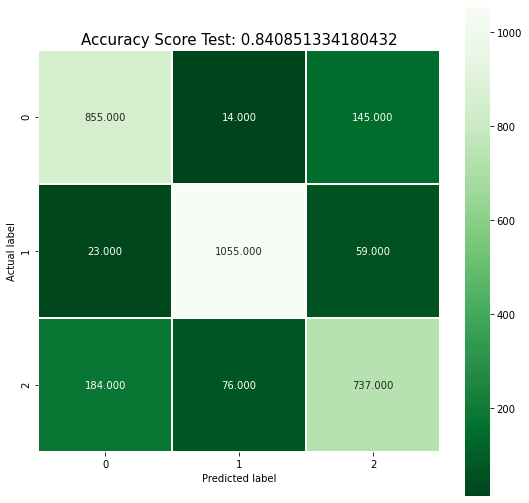

In [36]:
# Calculate Confusion Matrix for 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))

# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score Test: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(title,size=15)

print("\nHyperparameter Tuning Classification Report\n", classification_report(y_test, y_pred))

## PCA with Best Params

In [37]:
# Dimensionality Reduction with Principal Component Analysis (PCA)
pca = PCA(0.90) # Preserve 90% of the variance

X_transformed = pca.fit_transform(X_train) # Fit the pca transform with X_train
X_test_transformed = pca.transform(X_test) # Apply transform to X_test

# Training set shape after Principal Component Analysis form
print(X_transformed.shape)

# Original Training Set Shape
# Notice we lose 3,943 features using PCA, while preserving 90% variance
print(X_train.shape)

(12589, 157)
(12589, 4096)


In [38]:
# Since max features changed with PCA fitting, determine best about of features again
max_features = list(range(1,X_transformed.shape[1]))

for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X_transformed, y_train)
    train_pred = dt.predict(X_transformed)
    y_pred = dt.predict(X_test_transformed)
    
    print("For max feature:", max_feature)
    print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
    print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
    print("\nClassification Report\n", classification_report(y_test, y_pred))

# 82.2% accuracy with max features 134

For max feature: 1
===== Accuracy Train: 1.000
===== Accuracy Test: 0.456

Classification Report
               precision    recall  f1-score   support

           0       0.50      0.49      0.50      1014
           1       0.46      0.45      0.45      1137
           2       0.41      0.42      0.42       997

    accuracy                           0.46      3148
   macro avg       0.46      0.46      0.46      3148
weighted avg       0.46      0.46      0.46      3148

For max feature: 2
===== Accuracy Train: 1.000
===== Accuracy Test: 0.477

Classification Report
               precision    recall  f1-score   support

           0       0.52      0.52      0.52      1014
           1       0.50      0.48      0.49      1137
           2       0.41      0.43      0.42       997

    accuracy                           0.48      3148
   macro avg       0.48      0.48      0.48      3148
weighted avg       0.48      0.48      0.48      3148

For max feature: 3
===== Accuracy Train: 1

For max feature: 19
===== Accuracy Train: 1.000
===== Accuracy Test: 0.659

Classification Report
               precision    recall  f1-score   support

           0       0.70      0.68      0.69      1014
           1       0.71      0.72      0.71      1137
           2       0.56      0.57      0.57       997

    accuracy                           0.66      3148
   macro avg       0.66      0.66      0.66      3148
weighted avg       0.66      0.66      0.66      3148

For max feature: 20
===== Accuracy Train: 1.000
===== Accuracy Test: 0.702

Classification Report
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      1014
           1       0.79      0.78      0.79      1137
           2       0.60      0.60      0.60       997

    accuracy                           0.70      3148
   macro avg       0.70      0.70      0.70      3148
weighted avg       0.70      0.70      0.70      3148

For max feature: 21
===== Accuracy Train

For max feature: 37
===== Accuracy Train: 1.000
===== Accuracy Test: 0.734

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1014
           1       0.81      0.79      0.80      1137
           2       0.64      0.66      0.65       997

    accuracy                           0.73      3148
   macro avg       0.73      0.73      0.73      3148
weighted avg       0.74      0.73      0.73      3148

For max feature: 38
===== Accuracy Train: 1.000
===== Accuracy Test: 0.735

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1014
           1       0.80      0.80      0.80      1137
           2       0.64      0.65      0.65       997

    accuracy                           0.74      3148
   macro avg       0.73      0.73      0.73      3148
weighted avg       0.74      0.74      0.74      3148

For max feature: 39
===== Accuracy Train

For max feature: 55
===== Accuracy Train: 1.000
===== Accuracy Test: 0.752

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      1014
           1       0.84      0.84      0.84      1137
           2       0.65      0.66      0.65       997

    accuracy                           0.75      3148
   macro avg       0.75      0.75      0.75      3148
weighted avg       0.75      0.75      0.75      3148

For max feature: 56
===== Accuracy Train: 1.000
===== Accuracy Test: 0.757

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1014
           1       0.82      0.82      0.82      1137
           2       0.67      0.67      0.67       997

    accuracy                           0.76      3148
   macro avg       0.75      0.75      0.75      3148
weighted avg       0.76      0.76      0.76      3148

For max feature: 57
===== Accuracy Train

For max feature: 73
===== Accuracy Train: 1.000
===== Accuracy Test: 0.764

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.78      0.77      1014
           1       0.85      0.82      0.84      1137
           2       0.67      0.68      0.67       997

    accuracy                           0.76      3148
   macro avg       0.76      0.76      0.76      3148
weighted avg       0.77      0.76      0.76      3148

For max feature: 74
===== Accuracy Train: 1.000
===== Accuracy Test: 0.758

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1014
           1       0.84      0.84      0.84      1137
           2       0.67      0.67      0.67       997

    accuracy                           0.76      3148
   macro avg       0.75      0.75      0.75      3148
weighted avg       0.76      0.76      0.76      3148

For max feature: 75
===== Accuracy Train

For max feature: 91
===== Accuracy Train: 1.000
===== Accuracy Test: 0.759

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1014
           1       0.84      0.83      0.84      1137
           2       0.67      0.66      0.67       997

    accuracy                           0.76      3148
   macro avg       0.76      0.76      0.76      3148
weighted avg       0.76      0.76      0.76      3148

For max feature: 92
===== Accuracy Train: 1.000
===== Accuracy Test: 0.764

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      1014
           1       0.85      0.84      0.84      1137
           2       0.67      0.68      0.67       997

    accuracy                           0.76      3148
   macro avg       0.76      0.76      0.76      3148
weighted avg       0.77      0.76      0.76      3148

For max feature: 93
===== Accuracy Train

For max feature: 109
===== Accuracy Train: 1.000
===== Accuracy Test: 0.769

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1014
           1       0.85      0.84      0.84      1137
           2       0.68      0.69      0.68       997

    accuracy                           0.77      3148
   macro avg       0.77      0.77      0.77      3148
weighted avg       0.77      0.77      0.77      3148

For max feature: 110
===== Accuracy Train: 1.000
===== Accuracy Test: 0.753

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1014
           1       0.84      0.83      0.83      1137
           2       0.66      0.65      0.66       997

    accuracy                           0.75      3148
   macro avg       0.75      0.75      0.75      3148
weighted avg       0.75      0.75      0.75      3148

For max feature: 111
===== Accuracy Tr

For max feature: 127
===== Accuracy Train: 1.000
===== Accuracy Test: 0.764

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      1014
           1       0.85      0.84      0.84      1137
           2       0.67      0.69      0.68       997

    accuracy                           0.76      3148
   macro avg       0.76      0.76      0.76      3148
weighted avg       0.76      0.76      0.76      3148

For max feature: 128
===== Accuracy Train: 1.000
===== Accuracy Test: 0.761

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      1014
           1       0.83      0.83      0.83      1137
           2       0.67      0.66      0.67       997

    accuracy                           0.76      3148
   macro avg       0.76      0.76      0.76      3148
weighted avg       0.76      0.76      0.76      3148

For max feature: 129
===== Accuracy Tr

For max feature: 145
===== Accuracy Train: 1.000
===== Accuracy Test: 0.750

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.77      0.76      1014
           1       0.84      0.81      0.82      1137
           2       0.66      0.66      0.66       997

    accuracy                           0.75      3148
   macro avg       0.75      0.75      0.75      3148
weighted avg       0.75      0.75      0.75      3148

For max feature: 146
===== Accuracy Train: 1.000
===== Accuracy Test: 0.762

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1014
           1       0.83      0.82      0.83      1137
           2       0.67      0.69      0.68       997

    accuracy                           0.76      3148
   macro avg       0.76      0.76      0.76      3148
weighted avg       0.76      0.76      0.76      3148

For max feature: 147
===== Accuracy Tr

In [39]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

for depth in max_depths:
    # Initialize Classifier with max_depth
    dt = DecisionTreeClassifier(max_depth=depth)
    # Fit Classifier 
    dt.fit(X_transformed, y_train)
    # Train Classifier Prediction
    train_pred = dt.predict(X_transformed)
    # Test Classifier Prediction
    y_pred = dt.predict(X_test_transformed)
    
    print("For max depth:", depth)
    print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
    print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
    print("\nClassification Report\n", classification_report(y_test, y_pred))

#   Best Performing Depth 77.7%, max-depth=11

For max depth: 1.0
===== Accuracy Train: 0.531
===== Accuracy Test: 0.522

Classification Report
               precision    recall  f1-score   support

           0       0.47      0.76      0.58      1014
           1       0.58      0.77      0.66      1137
           2       0.00      0.00      0.00       997

    accuracy                           0.52      3148
   macro avg       0.35      0.51      0.41      3148
weighted avg       0.36      0.52      0.43      3148



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For max depth: 2.0
===== Accuracy Train: 0.646
===== Accuracy Test: 0.651

Classification Report
               precision    recall  f1-score   support

           0       0.65      0.60      0.62      1014
           1       0.86      0.67      0.75      1137
           2       0.51      0.68      0.58       997

    accuracy                           0.65      3148
   macro avg       0.67      0.65      0.65      3148
weighted avg       0.68      0.65      0.66      3148

For max depth: 3.0
===== Accuracy Train: 0.686
===== Accuracy Test: 0.689

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.57      0.65      1014
           1       0.81      0.77      0.79      1137
           2       0.55      0.72      0.63       997

    accuracy                           0.69      3148
   macro avg       0.70      0.69      0.69      3148
weighted avg       0.71      0.69      0.69      3148

For max depth: 4.0
===== Accuracy Train: 0

For max depth: 20.0
===== Accuracy Train: 0.997
===== Accuracy Test: 0.753

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.78      0.76      1014
           1       0.83      0.82      0.83      1137
           2       0.67      0.65      0.66       997

    accuracy                           0.75      3148
   macro avg       0.75      0.75      0.75      3148
weighted avg       0.75      0.75      0.75      3148

For max depth: 21.0
===== Accuracy Train: 0.998
===== Accuracy Test: 0.761

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      1014
           1       0.84      0.83      0.83      1137
           2       0.68      0.66      0.67       997

    accuracy                           0.76      3148
   macro avg       0.76      0.76      0.76      3148
weighted avg       0.76      0.76      0.76      3148

For max depth: 22.0
===== Accuracy Train

In [40]:
best_max_depth = 11
best_max_feature = 134

# Initialize Decision Trees model for PCA instance with best params
dt = DecisionTreeClassifier(max_features=best_max_feature, max_depth=best_max_depth)

# Use training data to fit Decision Trees model with transformed X_train
dt.fit(X_transformed, y_train.values.ravel())

# make prediction on entire train data
train_pred_pca = dt.predict(X_transformed)
y_pred_pca = dt.predict(X_test_transformed)

print("Best Params")
print("=====Accuracy Train PCA:", accuracy_score(y_train, train_pred_pca))
print("=====Accuracy Test PCA:", accuracy_score(y_test, y_pred_pca))

Best Params
=====Accuracy Train PCA: 0.954960679958694
=====Accuracy Test PCA: 0.775412960609911


# Conclusion

Sources Referenced for constructing this model:
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3